# KRX 공매도 통계 크롤링

공매도잔고현황에 대한 자료는 2016년 6월 30일 이후의 데이터만 제공됩니다.

 - 대상: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0203
 - 참고: https://blog.naver.com/ellijahbyeon/222223614118
 
**"공매도 잔고 / 개별종목 공매도"** 잔고 메뉴

위 해당 메뉴 화면에서 엑셀/CSV 다운로드를 클릭했을 때 나오는 ***generate.cmd*** 와 ***download.cmd*** 에서 얻은 정보만 입력해주면 크롤링이 가능합니다.

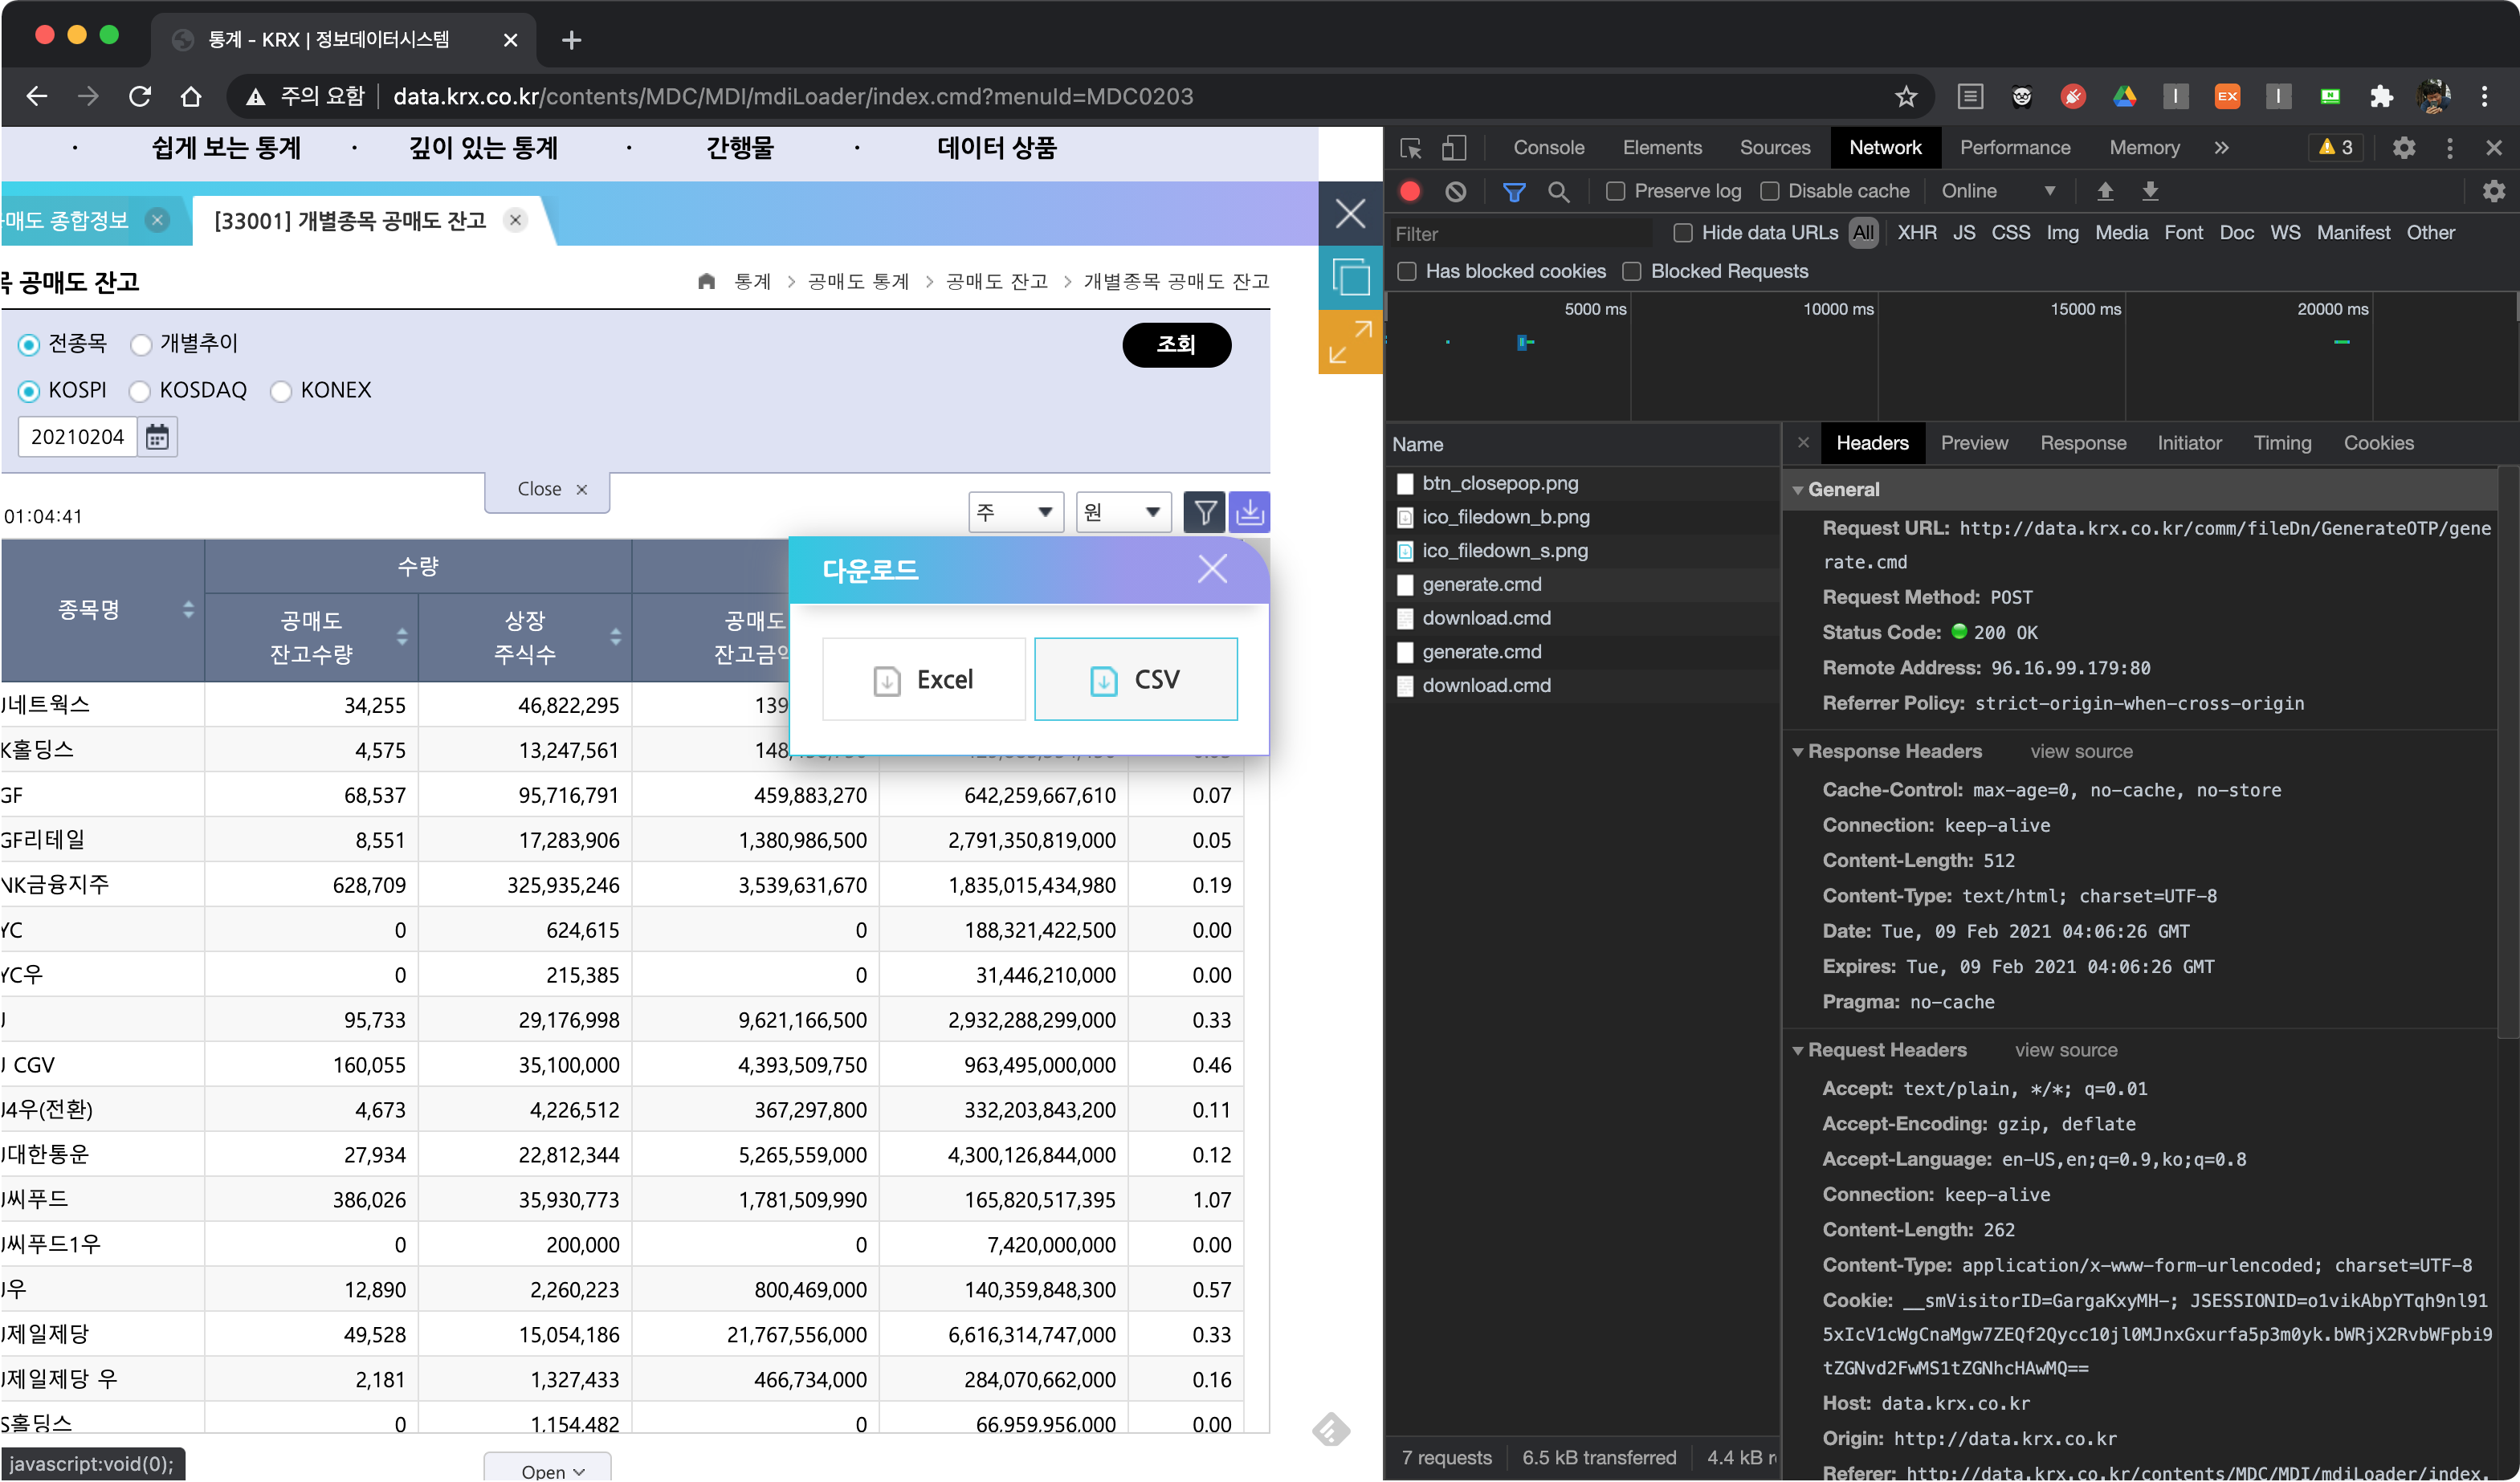

#### 공매도 금지

1. 2020년 3월 부터 2021년 6월15까지

In [79]:
'''
2016년 이후 KRX에서 제공받을 수 있는 공매도 데이터 크롤링.
 - 2021/2/9:
 - 
'''

import time
import pandas as pd
import requests
from io import BytesIO

try:
    from pathlib import Path
except ImportError:
    from pathlib2 import Path

dir_marcap = Path('../marcap/data')
dir_target = Path('data_shortselling')

def krx_shortshelling(tdate, ext='csv'):
    '''
    Parameter tdate: 
    Parameter ext: default csv. or xlsx
    '''
    gen_req_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'

    query_str_parms = {
        'searchType': 1,                  # 조회구분: 전종목 1 개별추이 2
        'mktTpCd': 1,                     # 시장구분 KOSPI 1 KOSDAQ 2 KONEX 3
        'trdDd': str(tdate),
        'tboxisuCd_finder_srtisu0_1': '', # '005930/삼성전자' 전종목- Null
        'isuCd':'', # 'KR...'
        'isuCd2': '', #
        'codeNmisuCd_finder_srtisu0_1': '', #'삼성전자'
        'param1isuCd_finder_srtisu0_1': '',
        'strtDd': 20210109,               # 개별종목 시작일
        'endDd': 20210209,
        'share': '1',
        'money': '1',
        'csvxls_isNo': 'false',
        'name': 'fileDown',
        'url': 'dbms/MDC/STAT/srt/MDCSTAT30501'
    }
    headers = {
        'Referer': 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0203', #'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36"
    }
    r = requests.get(gen_req_url, query_str_parms, headers=headers)
    form_data = {
        'code': r.content
    }

    if ext == 'xlsx':
        gen_req_url = 'http://data.krx.co.kr/comm/fileDn/download_excel/download.cmd'
        r = requests.post(gen_req_url, form_data, headers=headers)
        if len(r.content) <= 100:
            print(">>>> No data <<<<<", end=''); return

        df = pd.read_excel(BytesIO(r.content))
        df['일자'] = tdate

        file_name = 'ss_'+ str(tdate) + '.xlsx'
        file_path = dir_target / file_name
        if file_path.exists():
            print(file_name, ' EXISTS!!!')
        else:
            df.to_excel(file_path, index=False, index_label=None)
    else:
        gen_req_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
        r = requests.post(gen_req_url, form_data, headers=headers)
        if len(r.content) <= 100:
            print(">>>> No data <<<<<", end=''); return

        df = pd.read_csv(BytesIO(r.content), encoding='euc-kr')
        df['일자'] = tdate

        file_name = 'ss_'+ str(tdate) + '.csv'
        file_path = dir_target / file_name
        if file_path.exists():
            print(file_name, ' EXISTS!!!')
        else:
            df.to_csv(file_path, index=False, index_label=None, encoding='utf-8')
            
    print('KRX Shortselling completed :', tdate)
    return


#### 2016년은 2016년 6월30 부터 공매도 자료를 다운 받았다.

In [83]:
try:
    _t = time.strptime('{} {} {}'.format(2016, 6, 31), '%Y %m %d')
except ValueError:
    pass

In [84]:
'''
- 2016년6월30일부터 제공
'''
lt = time.localtime(time.time())
print('오늘 날짜 : ', time.strftime('%Y %m %d', lt))

start_y = 2016
end_y = 2017

print('============= 2016년 6월 30일 이후 전체종목 공매도 자료 =============')
for month in range(6, 13):
    print('============= {}월 전체종목 공매도 자료 ============='.format(month))
    for day in range(1, 32):
        try:
            _t = time.strptime('{} {} {}'
                    .format(start_y, month, day),'%Y %m %d')
        except ValueError:
            pass
        print(_t.tm_year, _t.tm_mon, _t.tm_mday, end='')
        # 이 달 1)매주 토/일, 2) 휴장일
        if (_t.tm_wday in [5,6]) or ( month == 6 and day < 30) :
            print('\t', "------P .... a .... a ..... s------")
            continue
        tdate = start_y * 10000 + month * 100 + day * 1
        # downloading!!!
        krx_shortshelling(tdate) #default csv file


오늘 날짜 :  2021 02 10
============= 2016년 6월 30일 이후 전체종목 공매도 자료 =============
============= 6월 전체종목 공매도 자료 =============
2016 6 1	 ------P .... a .... a ..... s------
2016 6 2	 ------P .... a .... a ..... s------
2016 6 3	 ------P .... a .... a ..... s------
2016 6 4	 ------P .... a .... a ..... s------
2016 6 5	 ------P .... a .... a ..... s------
2016 6 6	 ------P .... a .... a ..... s------
2016 6 7	 ------P .... a .... a ..... s------
2016 6 8	 ------P .... a .... a ..... s------
2016 6 9	 ------P .... a .... a ..... s------
2016 6 10	 ------P .... a .... a ..... s------
2016 6 11	 ------P .... a .... a ..... s------
2016 6 12	 ------P .... a .... a ..... s------
2016 6 13	 ------P .... a .... a ..... s------
2016 6 14	 ------P .... a .... a ..... s------
2016 6 15	 ------P .... a .... a ..... s------
2016 6 16	 ------P .... a .... a ..... s------
2016 6 17	 ------P .... a .... a ..... s------
2016 6 18	 ------P .... a .... a ..... s------
2016 6 19	 ------P .... a .... a ..... s----

#### 2017년 이후 현재까지 공매도 자료를 다운받는다.

In [85]:
'''
- 현재 날짜를 기준해서 종료를 처리
- 토일 및 증시 휴장일 처리
'''
lt = time.localtime(time.time())
print('오늘 날짜 : ', time.strftime('%Y %m %d', lt))

start_y = 2017
end_y = 2020

for year in range(start_y, end_y):
    for month in range(1, 13):
        # 올해 오늘이면 멈춤.
        if (year == lt.tm_year) and (month > lt.tm_mon):
            break
        print('============= {}월 전체종목 공매도 자료 ============='.format(month))
        for day in range(1, 32):
            try:
                _t = time.strptime('{} {} {}'
                        .format(start_y, month, day),'%Y %m %d')
            except ValueError:
                pass
            print(_t.tm_year, _t.tm_mon, _t.tm_mday, end='')
            # 이번달 오늘까지만 
            if (month == lt.tm_mon) and (day >= lt.tm_mday):
                break
            # 이 달 1)매주 토/일, 2) 휴장일
            if (_t.tm_wday in [5,6]): # or day in closure[month] :
                print('\t', "------P .... a .... a ..... s------")
                continue
            tdate = year * 10000 + month * 100 + day * 1
            # downloading!!!
            krx_shortshelling(tdate) #default csv file


오늘 날짜 :  2021 02 10
============= 1월 전체종목 공매도 자료 =============
2017 1 1	 ------P .... a .... a ..... s------
2017 1 2ss_20170102.csv  EXISTS!!!
KRX Shortselling completed : 20170102
2017 1 3ss_20170103.csv  EXISTS!!!
KRX Shortselling completed : 20170103
2017 1 4ss_20170104.csv  EXISTS!!!
KRX Shortselling completed : 20170104
2017 1 5ss_20170105.csv  EXISTS!!!
KRX Shortselling completed : 20170105
2017 1 6ss_20170106.csv  EXISTS!!!
KRX Shortselling completed : 20170106
2017 1 7	 ------P .... a .... a ..... s------
2017 1 8	 ------P .... a .... a ..... s------
2017 1 9ss_20170109.csv  EXISTS!!!
KRX Shortselling completed : 20170109
2017 1 10ss_20170110.csv  EXISTS!!!
KRX Shortselling completed : 20170110
2017 1 11ss_20170111.csv  EXISTS!!!
KRX Shortselling completed : 20170111
2017 1 12ss_20170112.csv  EXISTS!!!
KRX Shortselling completed : 20170112
2017 1 13ss_20170113.csv  EXISTS!!!
KRX Shortselling completed : 20170113
2017 1 14	 ------P .... a .... a ..... s------
2017 1 15	 ------P

### 파일 데이터 테스트

In [91]:
df = pd.read_csv( dir_target / 'ss_20180313.csv')
df.head(7)

,종목코드,종목명,수량_공매도잔고수량,수량_상장주식수,금액_공매도잔고금액,금액_시가총액,비중,일자
0,095570,AJ네트웍스,0,46822295,0,343207422350,0.00,20180313
1,068400,AJ렌터카,138323,22146300,1569966050,251360505000,0.62,20180313
2,006840,AK홀딩스,12580,13247561,966144000,1017412684800,0.09,20180313
3,027410,BGF,2049404,32263719,28076834800,442012950300,6.35,20180313
4,282330,BGF리테일,156473,17283906,26365700500,2912338161000,0.91,20180313
5,138930,BNK금융지주,1554433,325935246,16710154750,3503803894500,0.48,20180313
6,001460,BYC,0,624615,0,183324502500,0.00,20180313


# 전체 데이터 병합

1. 저장된 년도-일자별 파일을 하나의 년도 파일로 병합
2. 년도별 파일을 하나의 pickle 파일로 저장

### 1. 저장된 년도-일자별 파일을 하나의 년도 파일로 병합

In [92]:
start_y = 2016
end_y = 2020
print(f"{start_y} 에서 {end_y}까지 데이터 결합 ---- ")

for year in range(start_y, end_y):
    li = []
    files = []
    for f in sorted(dir_target.glob(f'ss_{year}*.csv')):
        files.append(f'{f.name}({f.stat().st_size})')
        print(f'{f.name}({f.stat().st_size})')
        df = pd.read_csv(f, parse_dates=['일자'], index_col=None, header=0)
        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=True)
    _ = { '종목코드': 'Code', '종목명': 'Name', '비중':'SSRate', '일자':'Date', 
         '수량_공매도잔고수량':'SSBalance','금액_공매도잔고금액':'SSPrice', 
         '수량_상장주식수':'Stocks', '금액_시가총액':'Marcap'}
    df.rename(columns=_, inplace=True)
    
    dest_file = f'../shortselling/data/shortselling-{year}.csv.gz'
    print(files, '--->', dest_file)
    df.to_csv(dest_file, compression='gzip')

2016 에서 2020까지 데이터 결합 ---- 
ss_20160630.csv(59570)
ss_20160701.csv(59578)
ss_20160704.csv(59546)
ss_20160705.csv(59511)
ss_20160706.csv(59555)
ss_20160707.csv(59542)
ss_20160708.csv(59575)
ss_20160711.csv(59600)
ss_20160712.csv(59594)
ss_20160713.csv(59636)
ss_20160714.csv(59726)
ss_20160715.csv(59767)
ss_20160718.csv(59804)
ss_20160719.csv(59799)
ss_20160720.csv(59784)
ss_20160721.csv(59743)
ss_20160722.csv(59723)
ss_20160725.csv(59761)
ss_20160726.csv(59757)
ss_20160727.csv(59730)
ss_20160728.csv(59682)
ss_20160729.csv(59775)
ss_20160801.csv(59751)
ss_20160802.csv(59789)
ss_20160803.csv(59873)
ss_20160804.csv(59925)
ss_20160805.csv(59867)
ss_20160808.csv(59876)
ss_20160809.csv(59908)
ss_20160810.csv(59885)
ss_20160811.csv(59857)
ss_20160812.csv(59846)
ss_20160816.csv(59836)
ss_20160817.csv(59905)
ss_20160818.csv(59881)
ss_20160819.csv(59915)
ss_20160822.csv(59953)
ss_20160823.csv(59997)
ss_20160824.csv(59991)
ss_20160825.csv(59954)
ss_20160826.csv(59917)
ss_20160829.csv(59930)
ss_201

### test

In [95]:
# df2 = pd.read_csv('../shortselling/data/shortselling-2021.csv.gz', parse_dates=['Date'])
df2 = pd.read_csv('../shortselling/data/shortselling-2017.csv.gz', index_col=0)
df2.head()

,Code,Name,SSBalance,Stocks,SSPrice,Marcap,SSRate,Date
0,095570,AJ네트웍스,3142,9364459,102115000,304344917500,0.03,2017-01-02
1,068400,AJ렌터카,80132,22146300,667499560,184478679000,0.36,2017-01-02
2,006840,AK홀딩스,5558,13247561,295129800,703445489100,0.04,2017-01-02
3,027410,BGF리테일,880033,49547625,71370676300,4018312387500,1.78,2017-01-02
4,138930,BNK금융지주,816397,325935246,7078161990,2825858582820,0.25,2017-01-02


### 2. 년도별 파일을 하나의 pickle 파일로 저장

1. 현재 년도 이전 통합 파일에 대한 pickle 저장
2. 현재 년도 통합 파일을 읽어, 이전 통합파일 Pick과 병합

#### 1. 작년까지 통합 파일 전체를 pickle 저장

In [96]:
'''1. 2016부터 올해까지 파일을 추가'''

start_y = 2016
end_y = time.localtime().tm_year
print(f"{start_y} 에서 {end_y}까지 데이터 결합 ---- ")

li = []
for year in range(start_y, end_y):
    file = Path(f'../shortselling/data/shortselling-{year}.csv.gz')
    if file.exists():
        _ = pd.read_csv(file, parse_dates=['Date'], index_col=0)
        li.append(_)
        print(file, ': ', _.shape, ', ', end='')

df = pd.concat(li, axis=0, ignore_index=True)
df.to_pickle(f'../shortselling_{start_y}-{end_y-1}.pkl') # 작년까지
print('')
print(df.shape)

2016 에서 2021까지 데이터 결합 ---- 
../shortselling/data/shortselling-2016.csv.gz :  (112366, 8) , ../shortselling/data/shortselling-2017.csv.gz :  (203631, 8) , ../shortselling/data/shortselling-2018.csv.gz :  (172021, 8) , ../shortselling/data/shortselling-2019.csv.gz :  (131936, 8) , ../shortselling/data/shortselling-2020.csv.gz :  (22912, 8) , 
(642866, 8)


In [99]:
df.shape

(642866, 8)

#### 2. 올해 통합 파일을 읽어, 이전 통합파일 Pick과 병합

현재 년도는 공매도 데이터가 쌓이고 있으므로 하루씩 갱신해서 최종 공매도 피클 파일에 추가해 준다.

In [98]:
end_y = time.localtime().tm_year
file = Path(f'../shortselling/data/shortselling-{end_y}.csv.gz')
if file.exists():
    _ = pd.read_csv(file, parse_dates=['Date'], index_col=0)
    # 전체 피클.
    li.append(_)
    print(file, ': ', _.shape, ', ', end='')
    _.to_pickle(f'../shortselling_{end_y}.pkl') # 작년까지

../shortselling/data/shortselling-2021.csv.gz :  (22950, 8) , 

In [104]:
df = pd.concat(li, axis=0, ignore_index=True)
df.to_pickle(f'../shortselling_2016-{end_y}.pkl') # 모든

## 모든 공매도 자료

모든 공매도 자료를 pickle 로 저장.

1. 올해 이전까지 전체 공매도 자료를 pickle 로 저장.
2. 올해 공매도 자료와 합병